[Link to Kaggle](https://www.kaggle.com/datasets/nalisha/health-insurance-charges-dataset/data?select=insurance.csv)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import kagglehub
from dotenv import load_dotenv, dotenv_values
import os

load_dotenv()

DATASET_PATH = os.getenv("DATASET_PATH")

filename = "insurance.csv"


In [15]:
df = pd.read_csv(DATASET_PATH + "/" + filename)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [18]:
# check for missing data
df.isna().sum()

age         1
sex         0
bmi         1
children    1
smoker      0
region      0
charges     0
dtype: int64

`age`, `bmi` and `children` have missing data. drop missing data

In [19]:
df_1 = df.dropna()
df_1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
# charges is the target variable
df_1['charges'].describe()

count     1335.000000
mean     13255.381012
std      12104.185093
min       1121.873900
25%       4742.306100
50%       9377.904700
75%      16582.138605
max      63770.428010
Name: charges, dtype: float64

The mean is 13,255.38 with standard deviation of 12,104.19 and median is 9,377.90 suggests a right skewed distribution. We shall confirm this with a denisty plot.

<Axes: xlabel='charges', ylabel='Count'>

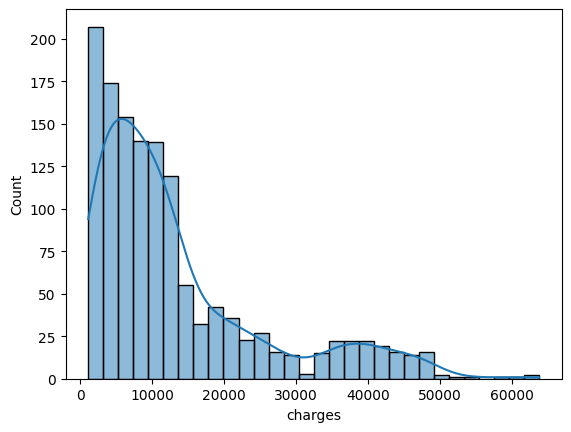

In [21]:
# TODO plot the density plot for charges
sns.histplot(data=df_1, x='charges', kde=True)

In [22]:
# Examine age
df_1['age'].describe()

count    1335.000000
mean       39.187266
std        14.034525
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The mean age is 39.2 years old with SD of 14.0. Median age is 39. This suggests a normally distributed age. Verify this with a density plot.

<Axes: xlabel='age', ylabel='Count'>

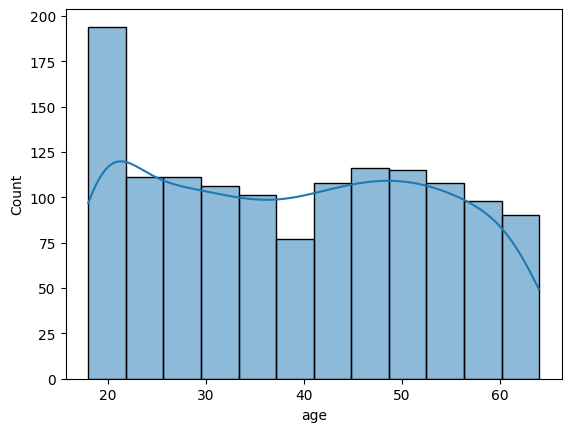

In [23]:
sns.histplot(data=df_1, x='age', kde=True)

Based on the plot, it is more of a uniform distribution than a normal distribution.

In [29]:
# Examine sex - categorical variable
df_1['sex'].value_counts().to_frame('count').assign(prop=lambda x: x['count']/x['count'].sum())

,count,prop
sex,,
male,675,0.505618
female,660,0.494382


Males and females are of equal proportion.

In [32]:
# check bmi
df_1['bmi'].describe()

count    1335.000000
mean       30.665404
std         6.102598
min        15.960000
25%        26.302500
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

Mean BMI is 30.7 with SD of 6.1 and median of 30.0.

<Axes: xlabel='bmi', ylabel='Count'>

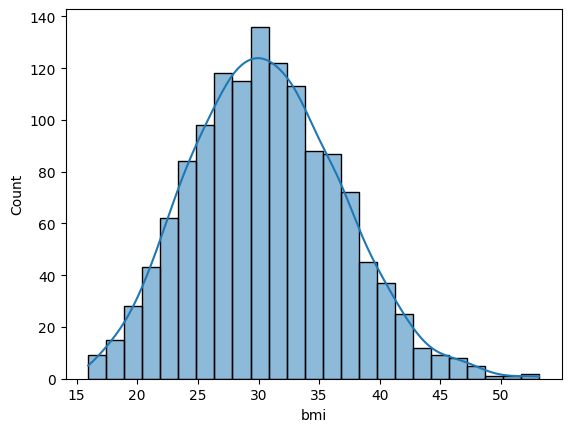

In [33]:
sns.histplot(data=df_1, x='bmi', kde=True)


`bmi` has is normally distributed.

In [39]:
# check children
df_1['children'].value_counts().to_frame('count').assign(prop = lambda x: x['count']/x['count'].sum())

,count,prop
children,,
0.0,571,0.427715
1.0,324,0.242697
2.0,240,0.179775
3.0,157,0.117603
4.0,25,0.018727
5.0,18,0.013483


0.43 has no children, followed by 0.24 with 1 child and 0.18 with 2 children.

In [43]:
# examine smoker
df_1['smoker'].value_counts().to_frame('count').assign(prop = lambda x: x['count']/x['count'].sum())

,count,prop
smoker,,
no,1062,0.795506
yes,273,0.204494


0.80 of the sample are non-smokers.

In [46]:
# check regions
df_1['region'].value_counts()

region
southeast    364
southwest    324
northeast    324
northwest    323
Name: count, dtype: int64

There are equal representation from the four regions.

The target variable `charges` is continuous. So we will implement a regression machine learning model.